<a href="https://colab.research.google.com/github/HarisMashood/ADL_Exercises/blob/main/Exercise_5_ADL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Student Name: Haris Mashood
## Student Number: 2413298
## Campus: Joensuu

# Exercise 5:

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import layers, models, Input
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

In [16]:
# Function to load and preprocess an image
def load_and_preprocess_image(image_path, target_size=(32, 32)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array.astype('float32') / 255.0
    return img_array

In [17]:
# Function to create a CNN model
def create_cnn(input_shape):
    inputs = Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    model = models.Model(inputs, outputs)
    return model

In [18]:
# Function to apply horizontal and vertical flip augmentation
def test_augmentation(image_path, model):
    img_array = load_and_preprocess_image(image_path, target_size=(32, 32))
    horizontal_flip = tf.image.flip_left_right(img_array)
    vertical_flip = tf.image.flip_up_down(img_array)

    # Show augmented images
    plt.figure(figsize=(12, 4))
    titles = ["Original", "Horizontal Flip", "Vertical Flip"]
    images = [img_array, horizontal_flip, vertical_flip]
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, 3, i + 1)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Predictions for augmented images
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    for img, title in zip(images, titles):
        img_expanded = np.expand_dims(img, axis=0)
        predictions = model.predict(img_expanded)
        predicted_class = class_names[np.argmax(predictions)]
        confidence = np.max(predictions) * 100
        print(f"{title}: Predicted class = {predicted_class}, Confidence = {confidence:.2f}%")

In [19]:
# Function to apply rotation augmentation
def test_rotation_augmentation(image_path, model):
    img = load_img(image_path, color_mode='grayscale', target_size=(28, 28))
    img_array = img_to_array(img)
    img_array = img_array.astype('float32') / 255.0

    rotation_angles = [0, 30, 45, 60]
    rotated_images = []

    for angle in rotation_angles:
        rotated = rotate(img_array, angle, reshape=False, mode='nearest')
        rotated_images.append(rotated)

    # Show rotated images
    plt.figure(figsize=(15, 5))
    for i, (img, angle) in enumerate(zip(rotated_images, rotation_angles)):
        plt.subplot(1, 4, i + 1)
        plt.imshow(img.squeeze(), cmap='gray')
        plt.title(f"Rotation {angle}°")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Predictions for rotated images
    print("Predictions for different images:")
    for angle, img in zip(rotation_angles, rotated_images):
        pred_input = img.reshape(1, 28, 28, 1)
        pred = model.predict(pred_input)
        predicted_class = np.argmax(pred)
        confidence = np.max(pred) * 100
        print(f"\nRotation {angle}°:")
        print(f"Predicted digit: {predicted_class}")
        print(f"Confidence: {confidence:.2f}%")

# Task 1: Load CIFAR-10 dataset and train the model

In [20]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Train the model on CIFAR-10
task1_model = create_cnn((32, 32, 3))
task1_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
task1_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3532 - loss: 1.7439 - val_accuracy: 0.5294 - val_loss: 1.2882
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5746 - loss: 1.2003 - val_accuracy: 0.5895 - val_loss: 1.1634
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6350 - loss: 1.0391 - val_accuracy: 0.6536 - val_loss: 0.9956
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6803 - loss: 0.9201 - val_accuracy: 0.6780 - val_loss: 0.9247
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7071 - loss: 0.8377 - val_accuracy: 0.6727 - val_loss: 0.9547
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7282 - loss: 0.7837 - val_accuracy: 0.6922 - val_loss: 0.8933
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7456 - loss: 0.7147 - val_accuracy: 0.6981 - val_loss: 0.8758
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7672 - loss: 0.6590 -

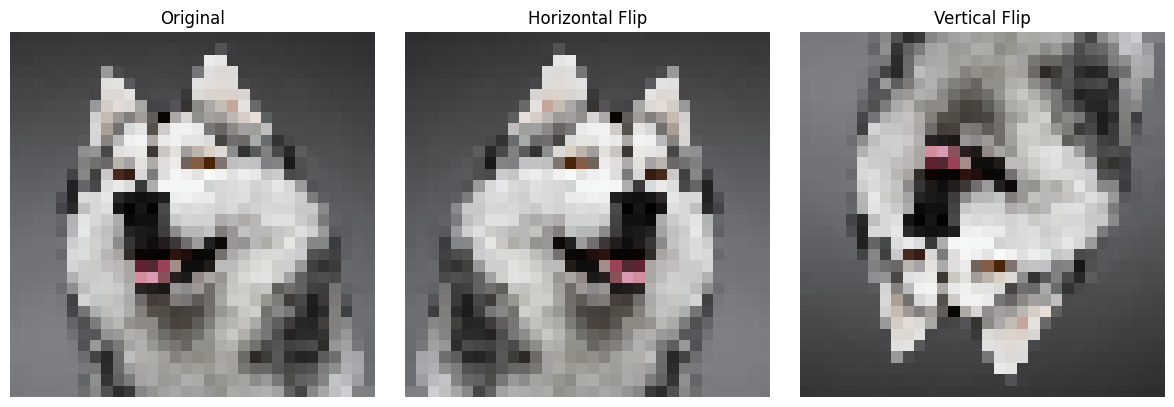

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
Original: Predicted class = dog, Confidence = 96.59%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Horizontal Flip: Predicted class = dog, Confidence = 74.55%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Vertical Flip: Predicted class = dog, Confidence = 95.19%


In [21]:
# Test on "dog.jpg"
test_augmentation('dog.jpg', task1_model)

# Task 2: Load MNIST dataset and train the model

In [22]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()
x_train_mnist = x_train_mnist.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test_mnist = x_test_mnist.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train_mnist = tf.keras.utils.to_categorical(y_train_mnist, 10)
y_test_mnist = tf.keras.utils.to_categorical(y_test_mnist, 10)

# Train the model on MNIST
task2_model = create_cnn((28, 28, 1))
task2_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
task2_model.fit(x_train_mnist, y_train_mnist, epochs=10, validation_data=(x_test_mnist, y_test_mnist), verbose=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8938 - loss: 0.3434 - val_accuracy: 0.9843 - val_loss: 0.0456
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9844 - loss: 0.0493 - val_accuracy: 0.9866 - val_loss: 0.0424
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9897 - loss: 0.0324 - val_accuracy: 0.9907 - val_loss: 0.0283
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9922 - loss: 0.0246 - val_accuracy: 0.9899 - val_loss: 0.0323
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9935 - loss: 0.0210 - val_accuracy: 0.9912 - val_loss: 0.0322
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9948 - loss: 0.0169 - val_accuracy: 0.9898 - val_loss: 0.0366
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9956 - loss: 0.0133 - val_accuracy: 0.9909 - val_loss: 0.0312
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━

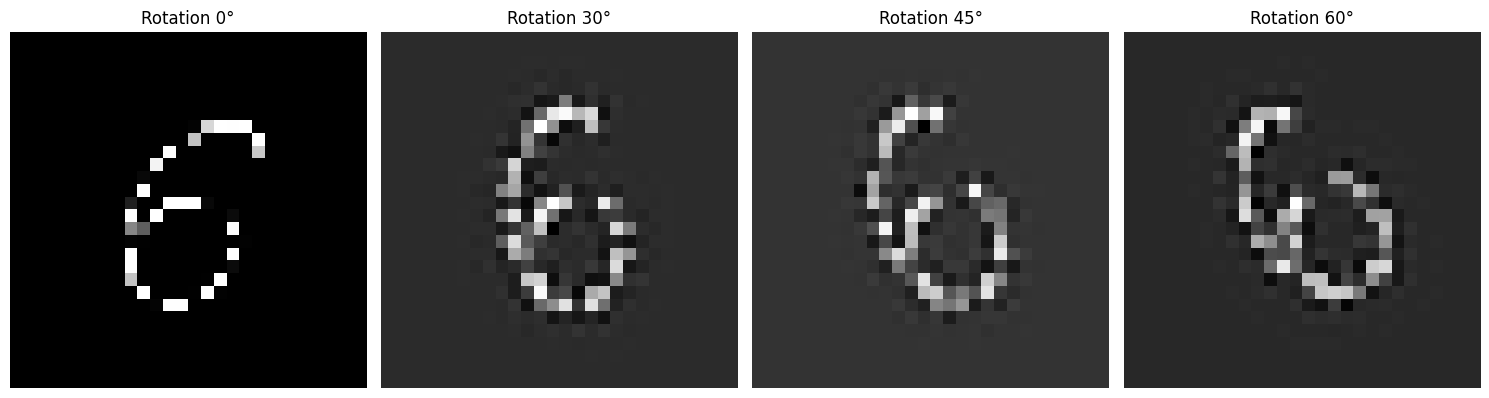

Predictions for different images:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step

Rotation 0°:
Predicted digit: 5
Confidence: 98.42%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Rotation 30°:
Predicted digit: 5
Confidence: 91.54%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Rotation 45°:
Predicted digit: 5
Confidence: 50.95%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Rotation 60°:
Predicted digit: 6
Confidence: 87.42%


In [23]:
# Test on "handwritten6.jpg"
test_rotation_augmentation('handwritten6.jpg', task2_model)

# Results Breakdown

## CIFAR-10 Dataset:

* Achieved 71.83% validation accuracy after 10 epochs.

* Predicted the original "dog" image with high confidence (96.59%). Horizontal flip confidence dropped to 74.55%, suggesting limited robustness to this augmentation.

## MNIST Dataset:

* Achieved 99.06% validation accuracy after 10 epochs.

* Did not perform that well, it was able to predict "6" at 60° rotation whereas for 0°, 30°, and 45° all predicted "5" which is wrong.